In [99]:
# System
import os

# Data Analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

import tensorflow as tf

import pickle

# Get Data

In [100]:
file_path = os.path.normpath(os.getcwd() + os.sep + os.pardir) + "/cutfree-simulations/runtime_data_v2.csv"
df_original = pd.read_csv(file_path)
df = df_original.copy()
df.iloc[0]

Oligo                        NNNNNN
OligoLength                       6
Sites                   Any["YATR"]
TotalSites                        1
SiteLength                        4
CutFree_Randomer             NBNVVN
CutFree_Degeneracy          7.45472
CutFree_Time               0.006211
CutFreeRL_Randomer           NNVVVN
CutFreeRL_Degeneracy        7.45472
CutFreeRL_Time             0.228063
Name: 0, dtype: object

In [101]:
complexity = np.log(df["OligoLength"]) + np.log(df["TotalSites"]) + np.log(df["SiteLength"])
df["Complexity"] = complexity
df

,Oligo,OligoLength,Sites,TotalSites,SiteLength,CutFree_Randomer,CutFree_Degeneracy,CutFree_Time,CutFreeRL_Randomer,CutFreeRL_Degeneracy,CutFreeRL_Time,Complexity
0,NNNNNN,6,"Any[""YATR""]",1,4,NBNVVN,7.454720,0.006211,NNVVVN,7.454720,0.228063,3.178054
1,NNNNNN,6,"Any[""TTAA"", ""RGCY""]",2,4,NVNRDN,7.049255,0.007820,NNDBRB,6.761573,0.087950,3.871201
2,NNNNNN,6,"Any[""CGCG"", ""CCTC"", ""CTAG""]",3,4,NDDHHN,7.167038,0.010071,NNNWWH,6.643790,0.136403,4.276666
3,NNNNNN,6,"Any[""CNNR"", ""GATC"", ""AATT"", ""TCGA""]",4,4,NDGYHN,5.662960,0.013531,RRRNRN,5.545177,0.150443,4.564348
4,NNNNNN,6,"Any[""AATT"", ""CATG"", ""ASST"", ""CNNR"", ""YATR""]",5,4,RDDVMM,5.375278,0.013882,NNNCCC,4.158883,0.183784,4.787492
...,...,...,...,...,...,...,...,...,...,...,...,...
5244,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,40,"Any[""CGCCGGCG"", ""CCTGCAGG"", ""CRCCGGYG"", ""RTGCG...",6,8,NNNDDDNNDDDNNDDDNNDDDNNDDDNNDDDNNDDDNNNN,49.410451,12.737720,NNNNNDDANNNNDDANNNHHNNHHHNNHHHNDHHNHHHNN,47.500908,4.200124,7.560080
5245,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,40,"Any[""ATTTAAAT"", ""CGCCGGCG"", ""CRCCGGYG"", ""GGCGC...",7,8,NNNNNHBWNBNVNWVNDHNNBVWNVNNVWNVNNVWNNNNN,48.246172,60.120769,NNNNNBNWYNBNNHVNADNNNBNBDWYNNBNNBHWBNNND,46.859877,3.009765,7.714231
5246,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,40,"Any[""CCTGCAGG"", ""VCTCGAGB"", ""CGTCGACG"", ""CGCCG...",8,8,NNNDDNSNNWNVBNVBNWNNBVBNWNVBNVBNWNNBNBNN,47.670807,60.379011,NNVDNNBNBWHHRKNNKNNKNDBNBHBHHYNBBBBNHWDW,44.440638,3.989743,7.847763
5247,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,40,"Any[""VCTCGAGB"", ""RTGCGCAY"", ""CGCGCGCG"", ""GGCCG...",9,8,NNNDDNBDDBDRDNVNDDVDDVNDDDNBDNBDWNBNHBNN,46.873428,60.156297,NNNNNNYWRBNNNNDAHVVNNBHHBDNANVVNNHRDNANN,44.492754,3.611050,7.965546


In [102]:
df_total = df[["Oligo", "Sites"]]
df_total

,Oligo,Sites
0,NNNNNN,"Any[""YATR""]"
1,NNNNNN,"Any[""TTAA"", ""RGCY""]"
2,NNNNNN,"Any[""CGCG"", ""CCTC"", ""CTAG""]"
3,NNNNNN,"Any[""CNNR"", ""GATC"", ""AATT"", ""TCGA""]"
4,NNNNNN,"Any[""AATT"", ""CATG"", ""ASST"", ""CNNR"", ""YATR""]"
...,...,...
5244,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,"Any[""CGCCGGCG"", ""CCTGCAGG"", ""CRCCGGYG"", ""RTGCG..."
5245,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,"Any[""ATTTAAAT"", ""CGCCGGCG"", ""CRCCGGYG"", ""GGCGC..."
5246,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,"Any[""CCTGCAGG"", ""VCTCGAGB"", ""CGTCGACG"", ""CGCCG..."
5247,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,"Any[""VCTCGAGB"", ""RTGCGCAY"", ""CGCGCGCG"", ""GGCCG..."


In [103]:
df_total.drop_duplicates(inplace=True)
df_total

C:\Users\wrick\AppData\Local\Temp/ipykernel_21160/4281427459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total.drop_duplicates(inplace=True)


,Oligo,Sites
0,NNNNNN,"Any[""YATR""]"
1,NNNNNN,"Any[""TTAA"", ""RGCY""]"
2,NNNNNN,"Any[""CGCG"", ""CCTC"", ""CTAG""]"
3,NNNNNN,"Any[""CNNR"", ""GATC"", ""AATT"", ""TCGA""]"
4,NNNNNN,"Any[""AATT"", ""CATG"", ""ASST"", ""CNNR"", ""YATR""]"
...,...,...
5244,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,"Any[""CGCCGGCG"", ""CCTGCAGG"", ""CRCCGGYG"", ""RTGCG..."
5245,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,"Any[""ATTTAAAT"", ""CGCCGGCG"", ""CRCCGGYG"", ""GGCGC..."
5246,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,"Any[""CCTGCAGG"", ""VCTCGAGB"", ""CGTCGACG"", ""CGCCG..."
5247,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,"Any[""VCTCGAGB"", ""RTGCGCAY"", ""CGCGCGCG"", ""GGCCG..."


# Visualize Data

In [104]:
df_total = df[["Complexity", "CutFree_Time"]]
df_total.head()

,Complexity,CutFree_Time
0,3.178054,0.006211
1,3.871201,0.007820
2,4.276666,0.010071
3,4.564348,0.013531
4,4.787492,0.013882


[[0.1803921568627451, 0.4235294117647059, 0.7450980392156863], [0.1803921568627451, 0.4235294117647059, 0.7450980392156863], [0.1803921568627451, 0.4235294117647059, 0.7450980392156863], [0.1803921568627451, 0.4235294117647059, 0.7450980392156863], [0.1803921568627451, 0.4235294117647059, 0.7450980392156863], [0.1803921568627451, 0.4235294117647059, 0.7450980392156863], [0.1803921568627451, 0.4235294117647059, 0.7450980392156863], [0.1803921568627451, 0.4235294117647059, 0.7450980392156863], [0.1803921568627451, 0.4235294117647059, 0.7450980392156863], [0.1803921568627451, 0.4235294117647059, 0.7450980392156863], [0.1803921568627451, 0.4235294117647059, 0.7450980392156863], [0.1803921568627451, 0.4235294117647059, 0.7450980392156863], [0.1803921568627451, 0.4235294117647059, 0.7450980392156863], [0.1803921568627451, 0.4235294117647059, 0.7450980392156863], [0.1803921568627451, 0.4235294117647059, 0.7450980392156863], [0.1803921568627451, 0.4235294117647059, 0.7450980392156863], [0.1803

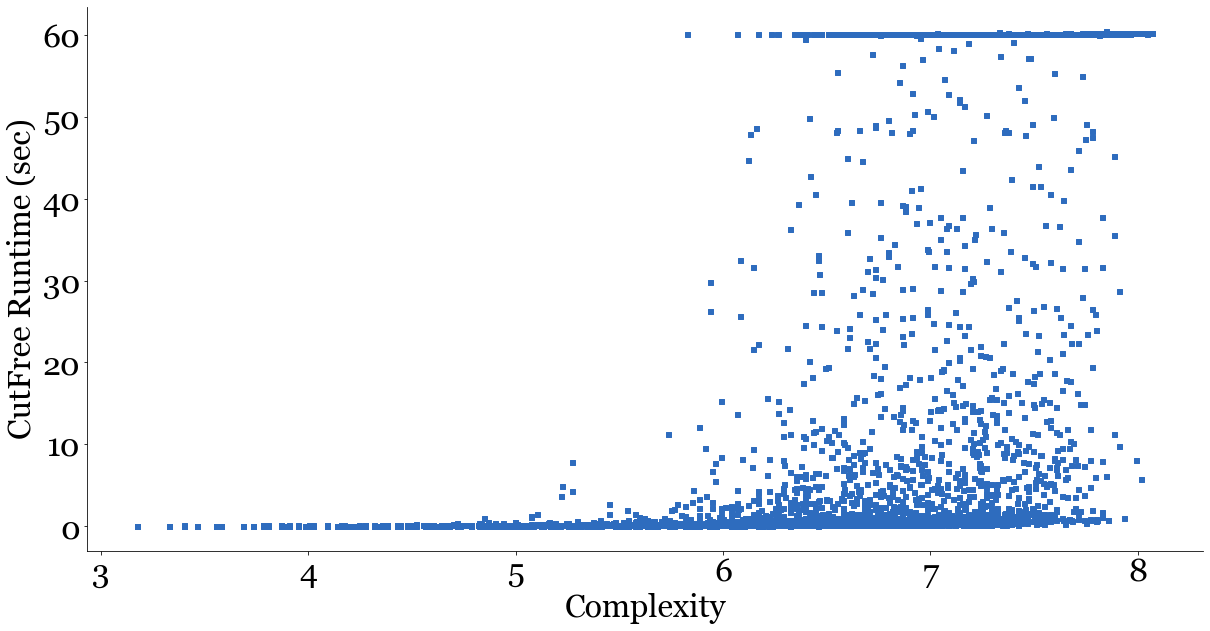

In [107]:
plt.figure(figsize=(20,10))

rgb = []
for _ in df_total.index:
    c = [46/255, 108/255 , 190/255]
    rgb.append(c)

print(rgb)
plt.scatter(
    df_total.Complexity, df_total.CutFree_Time, 
    c = rgb,
    linewidths = 1,
    marker ="s",
    s = 25)

gfont = {'fontname':'Georgia'}
#plt.title("CutFree Runtime vs. Complexity of Input", fontsize=28)
plt.xlabel("Complexity", fontsize=32, **gfont)
plt.ylabel("CutFree Runtime (sec)", fontsize=32, **gfont)
plt.xticks(fontsize=32, **gfont)
plt.yticks(fontsize=32, **gfont)
ax = plt.gca()
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)